In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set( rc={'figure.figsize':(16,10)} )

# Cumulative Rewards

In [68]:
cr = pd.read_excel('CumulativeReward.xlsx')
cr['Details'] = cr['Model'] + ' ( N=' + cr['Steps'].astype(str) + ', H=' + cr['Horizon'].astype(str) + ' )'
cr.head( )

,Slippery,Model,Horizon,Steps,Episode,CumulativeReward,Details
0,True,NSTEP,0,1000,1,-32.45,"NSTEP ( N=1000, H=0 )"
1,True,NSTEP,0,1000,2,-22.50,"NSTEP ( N=1000, H=0 )"
2,True,NSTEP,0,1000,3,-55.25,"NSTEP ( N=1000, H=0 )"
3,True,NSTEP,0,1000,4,-87.55,"NSTEP ( N=1000, H=0 )"
4,True,NSTEP,0,1000,5,-120.25,"NSTEP ( N=1000, H=0 )"


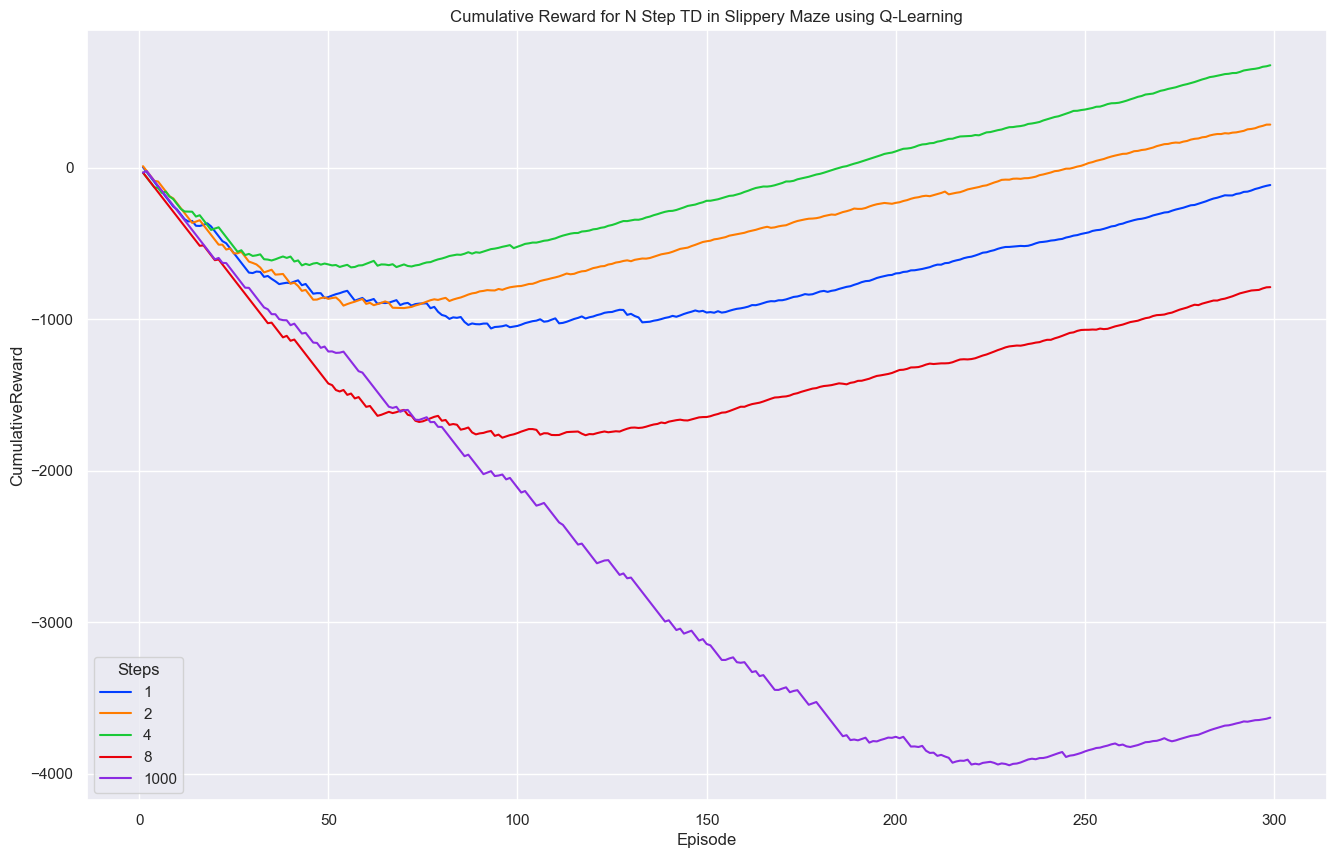

In [85]:
sns.lineplot( data=cr[(cr['Slippery']==True) & (cr['Model']=='NSTEP') & (cr['Episode']<300)], x='Episode', y='CumulativeReward', hue='Steps', palette='bright' )
plt.title( 'Cumulative Reward for N Step TD in Slippery Maze using Q-Learning' )
plt.show( )

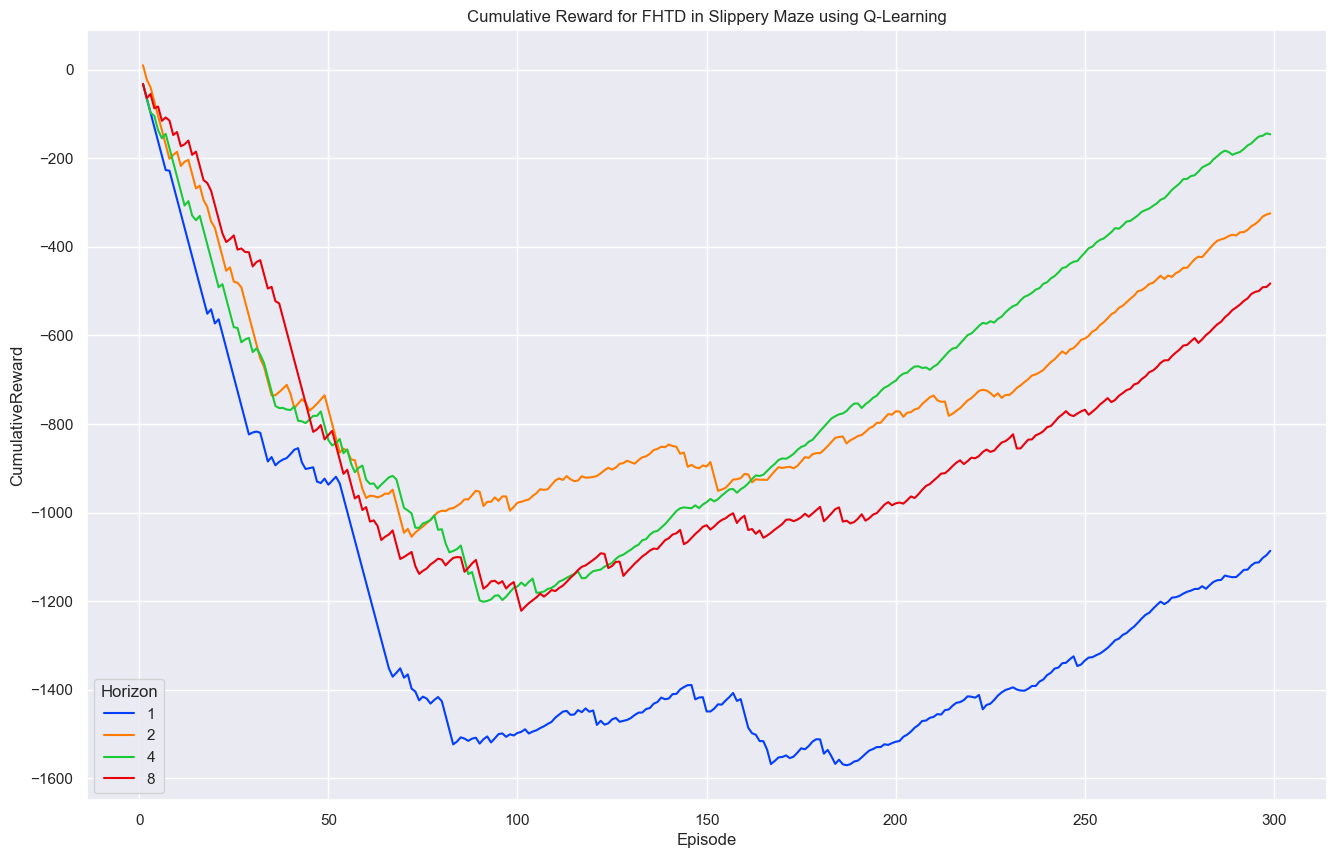

In [86]:
sns.lineplot( data=cr[(cr['Slippery']==True) & (cr['Model']=='FHTD') & (cr['Episode']<300)], x='Episode', y='CumulativeReward', hue='Horizon', palette='bright' )
plt.title( 'Cumulative Reward for FHTD in Slippery Maze using Q-Learning' )
plt.show( )

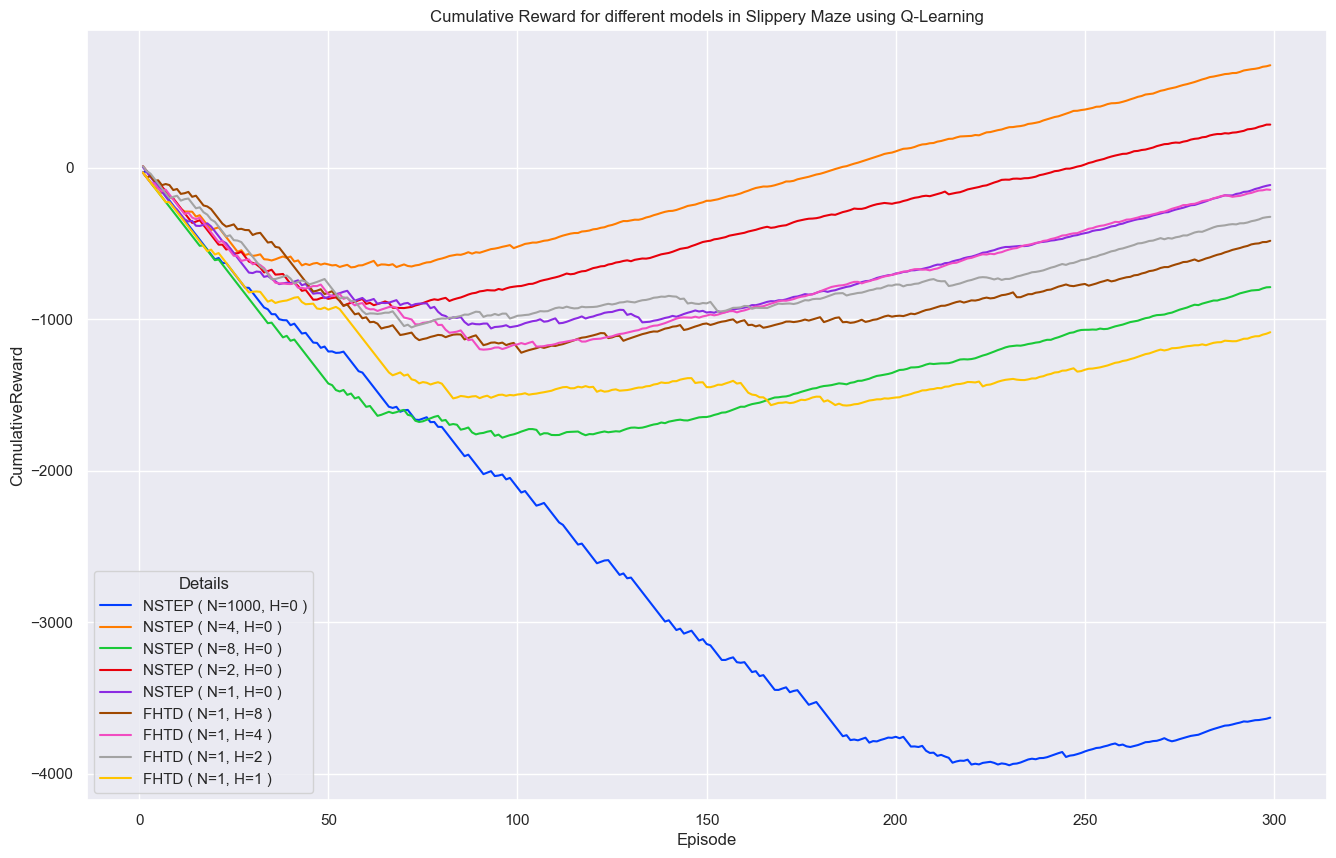

In [87]:
sns.lineplot( data=cr[(cr['Slippery']==True) & (cr['Episode']<300)], x='Episode', y='CumulativeReward', hue='Details', palette='bright' )
plt.title( 'Cumulative Reward for different models in Slippery Maze using Q-Learning' )
plt.show( )

# Convergence / Win Rate over Episodes

In [72]:
wr = pd.read_excel( 'WinRate.xlsx' )
wr['Details'] = wr['Model'] + ' ( N=' + wr['Steps'].astype(str) + ', H=' + wr['Horizon'].astype(str) + ' )'
wr.head( )

,Slippery,Model,Horizon,Steps,Episode,WinRate,Details
0,True,NSTEP,0,1000,5,0.045455,"NSTEP ( N=1000, H=0 )"
1,True,NSTEP,0,1000,10,0.045455,"NSTEP ( N=1000, H=0 )"
2,True,NSTEP,0,1000,15,0.227273,"NSTEP ( N=1000, H=0 )"
3,True,NSTEP,0,1000,20,0.227273,"NSTEP ( N=1000, H=0 )"
4,True,NSTEP,0,1000,25,0.090909,"NSTEP ( N=1000, H=0 )"


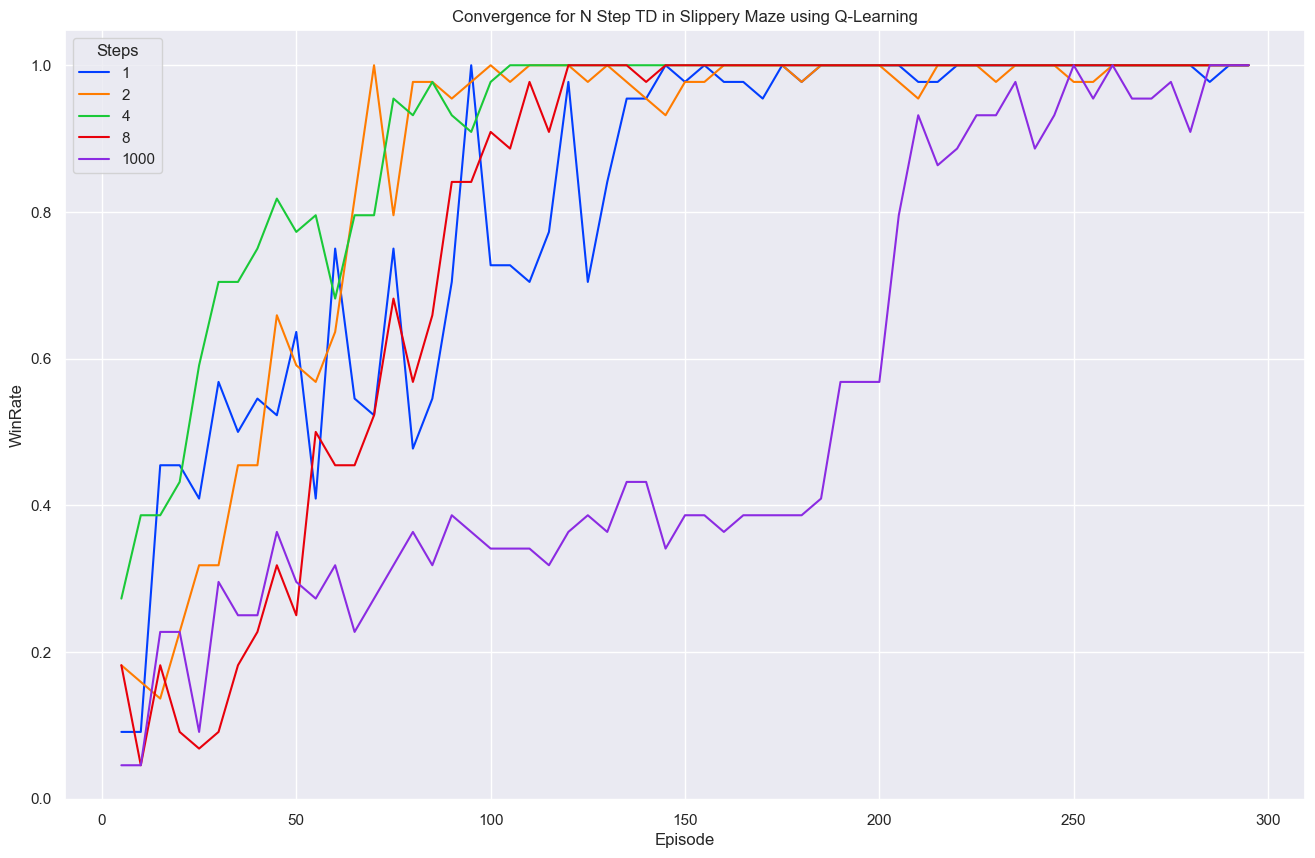

In [84]:
sns.lineplot( data=wr[(wr['Slippery']==True) & (wr['Model']=='NSTEP') & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Steps', palette='bright' )
plt.title( 'Convergence for N Step TD in Slippery Maze using Q-Learning' )
plt.show( )

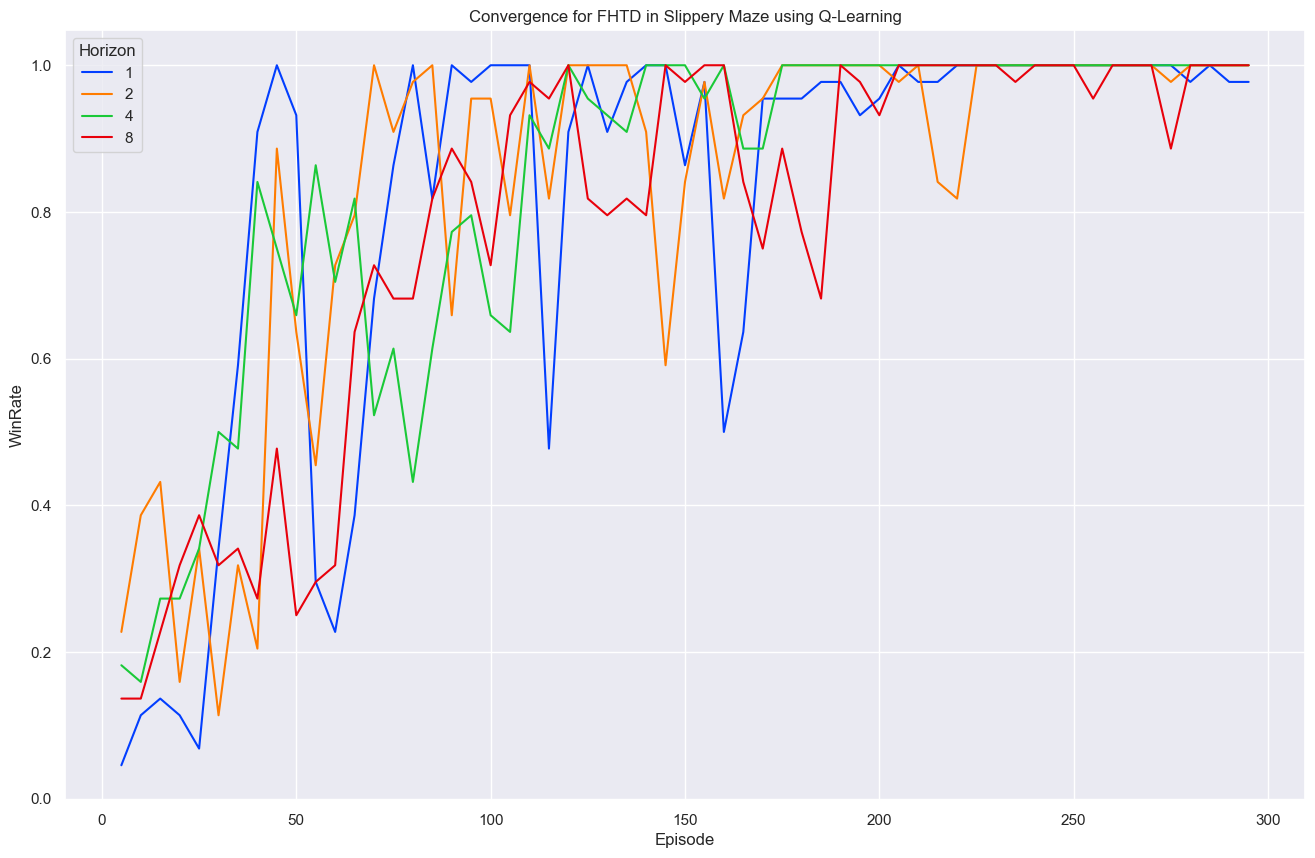

In [83]:
sns.lineplot( data=wr[(wr['Slippery']==True) & (wr['Model']=='FHTD') & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Horizon', palette='bright' )
plt.title( 'Convergence for FHTD in Slippery Maze using Q-Learning' )
plt.show( )

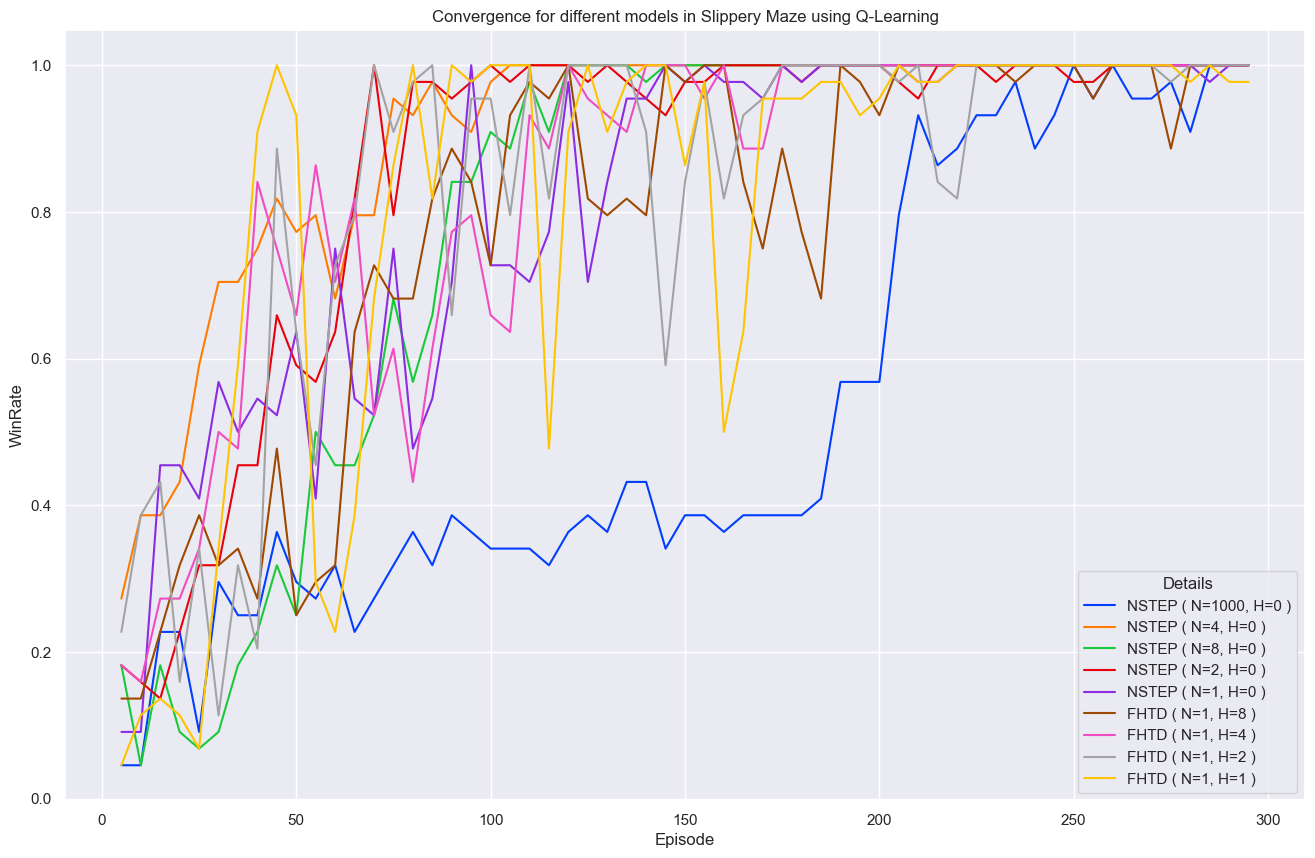

In [82]:
sns.lineplot( data=wr[(wr['Slippery']==True) & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Details', palette='bright' )
plt.title( 'Convergence for different models in Slippery Maze using Q-Learning' )
plt.show( )

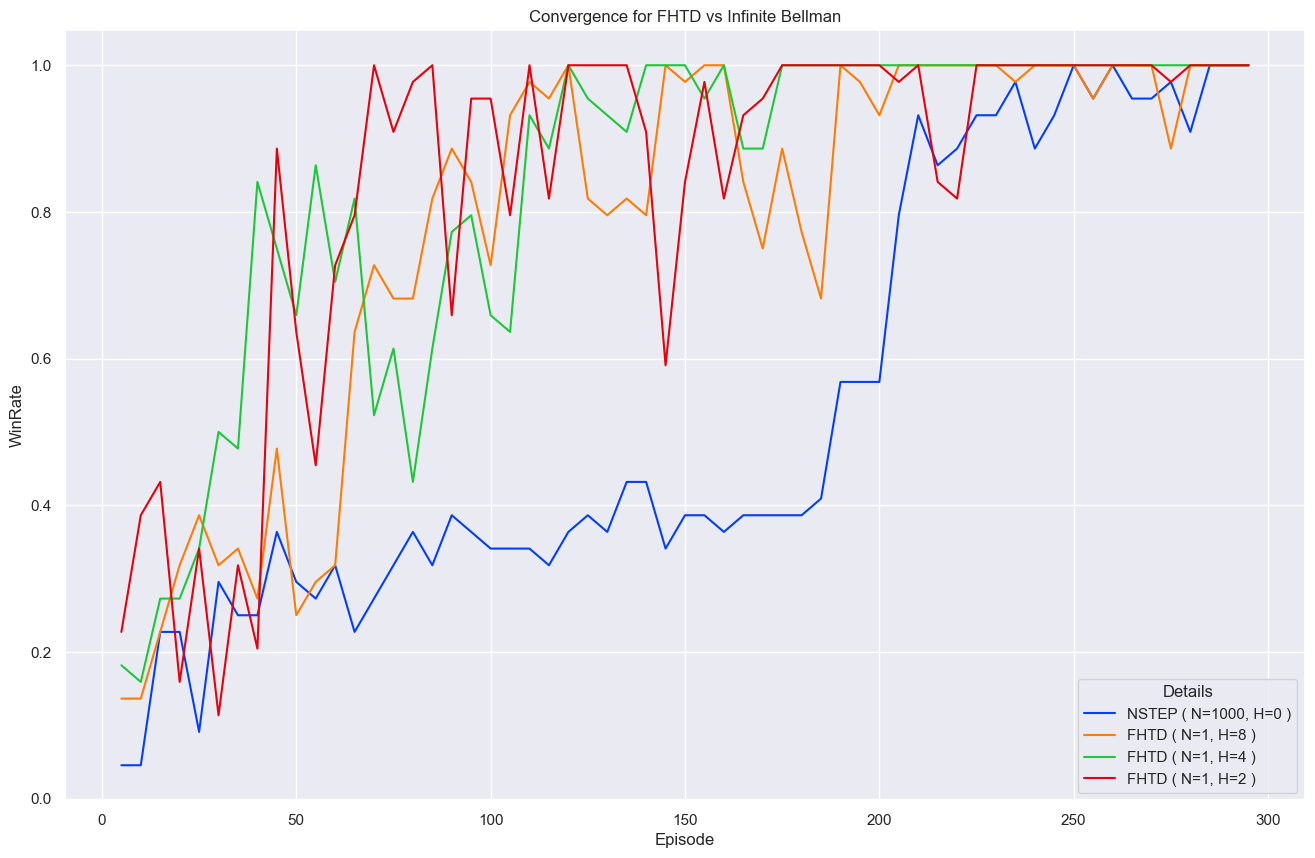

In [81]:
sns.lineplot( data=wr[(wr['Slippery']==True) & ( (wr['Horizon']>1) | (wr['Steps']==1000) ) & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Details', palette='bright' )
plt.title( 'Convergence for FHTD vs Infinite Bellman' )
plt.show( )